# MRS Encircled Energy Fraction
In this notebook we determine the encircled energy fraction
  
The notebook was created on: May 9th 2018  
The author of the notebook is: Ioannis Argyriou (Institute of Astronomy, KUL)  
The author's email is: ioannis.argyriou@kuleuven.be

In [1]:
import funcs
import mrsobs

import numpy as np
from astropy.io import fits
from scipy.interpolate import interp1d
from shapely.geometry import Point
import shapely.affinity
from scipy.optimize import curve_fit
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# 1-Define the paths to the data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'CV2_data/LVL2/'

# 3-load the MRS distortion maps, they are used extensively in a multitude of python functions relating to the analysis of MRS data
band     = '1A' # this is the spectral band (side of the slope image) to be analyzed
d2cMaps   = funcs.load_obj('d2cMaps_band'+band+'_tr80pc',path=d2cMapDir) # here, d2c stands for detector to cube transformation, from x,y integer pixel coordinates, to alpha, beta (or RA and DEC), and wavelength coordinates
det_dims = (1024,1032) # placeholder for the dimension of the detector

psffits,specres_table = funcs.get_cdps(band,cdpDir)[3:5]

# sci_file = lvl2path+'FM1T00011453/MIRFM1T00011453_1_495_SE_2011-06-03T21h10m39_LVL2.fits'
# hdulist_sci   = fits.open(sci_file)
# source_signal = hdulist_sci[1].data[0,:,:]

sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='P4',output='img')
source_signal = sci_img-bkg_img
fringe_img = funcs.get_cdps(band,cdpDir,output='img')[0]
source_signal_divfringe = source_signal/fringe_img

sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='P15',output='img')
source_signal = sci_img-bkg_img
fringe_img = funcs.get_cdps(band,cdpDir,output='img')[0]
source_signal_divfringe2 = source_signal/fringe_img

In [3]:
lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table)
print('There are {} spectral bins'.format(len(lambcens)))

There are 598 spectral bins


In [4]:
source_alpha_center = 0
source_beta_center  = 0

psf_cdp = funcs.evaluate_psf_cdp(psffits,d2cMaps,source_center=[source_alpha_center,source_beta_center])

STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.88arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 38, 39, 40, 42, 120, 121, 122, 196, 202, 294, 295, 303, 304, 305, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]


<IPython.core.display.Javascript object>


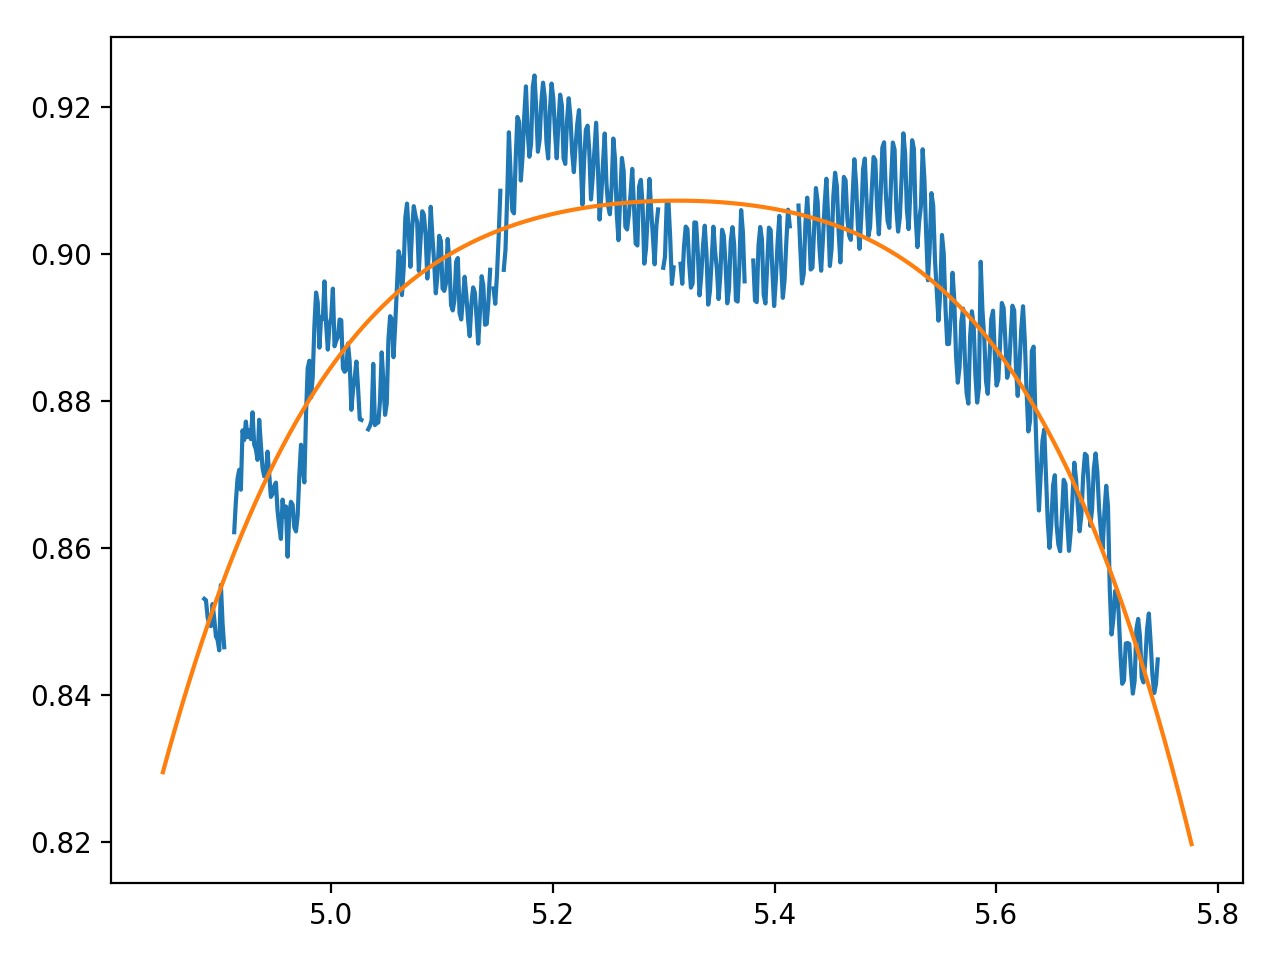

<IPython.core.display.Javascript object>


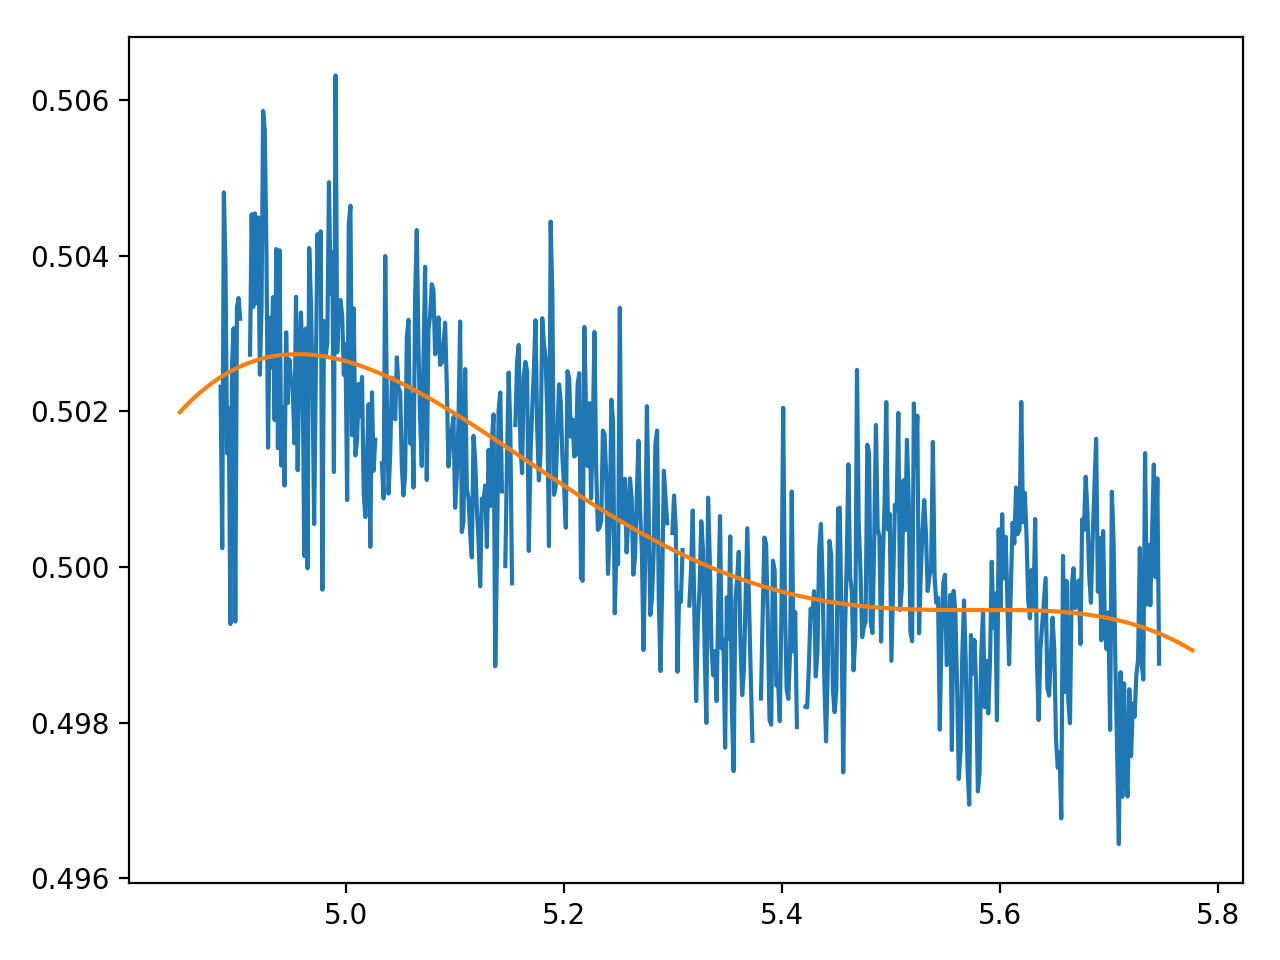

In [50]:
sign_amp,alpha_centers,beta_centers,sigma_alpha,sigma_beta,bkg_amp = funcs.point_source_centroiding(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')

source_alpha_center = np.mean(alpha_centers[~np.isnan(alpha_centers)])
source_beta_center  = np.mean(beta_centers[~np.isnan(beta_centers)])

popt = np.polyfit(lambcens[~np.isnan(alpha_centers)],alpha_centers[~np.isnan(alpha_centers)],4)
alpha_poly = np.poly1d(popt)
popt = np.polyfit(lambcens[~np.isnan(beta_centers)],beta_centers[~np.isnan(beta_centers)],4)
beta_poly = np.poly1d(popt)

plt.figure()
plt.plot(lambcens,alpha_centers)
plt.plot(lambcens,alpha_poly(lambcens))
plt.tight_layout()

plt.figure()
plt.plot(lambcens,beta_centers)
plt.plot(lambcens,beta_poly(lambcens))
plt.tight_layout()

STEP 1: Rough centroiding
Slice 4 has the largest summed flux
Source position: beta = -1.24arcsec, alpha = 0.74arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 140, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 63, 64, 66, 67, 68, 69, 71, 72, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 170, 171, 230, 231, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,

<IPython.core.display.Javascript object>


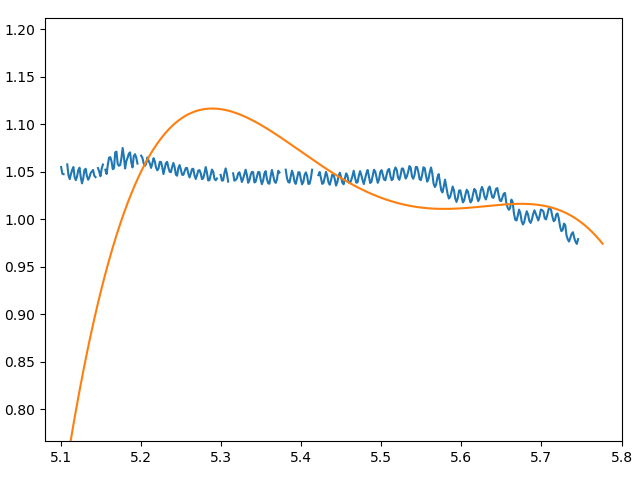

<IPython.core.display.Javascript object>


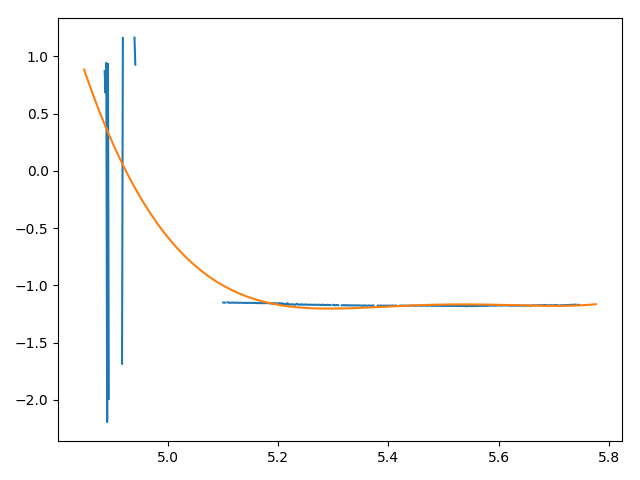

In [24]:
sign_amp,alpha_centers,beta_centers,sigma_alpha,sigma_beta,bkg_amp = funcs.point_source_centroiding(band,source_signal_divfringe2,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')

source_alpha_center = np.mean(alpha_centers[~np.isnan(alpha_centers)])
source_beta_center  = np.mean(beta_centers[~np.isnan(beta_centers)])

popt = np.polyfit(lambcens[~np.isnan(alpha_centers)],alpha_centers[~np.isnan(alpha_centers)],4)
alpha_poly = np.poly1d(popt)
popt = np.polyfit(lambcens[~np.isnan(beta_centers)],beta_centers[~np.isnan(beta_centers)],4)
beta_poly = np.poly1d(popt)

plt.figure()
plt.plot(lambcens,alpha_centers)
plt.plot(lambcens,alpha_poly(lambcens))
plt.tight_layout()

plt.figure()
plt.plot(lambcens,beta_centers)
plt.plot(lambcens,beta_poly(lambcens))
plt.tight_layout()

<IPython.core.display.Javascript object>


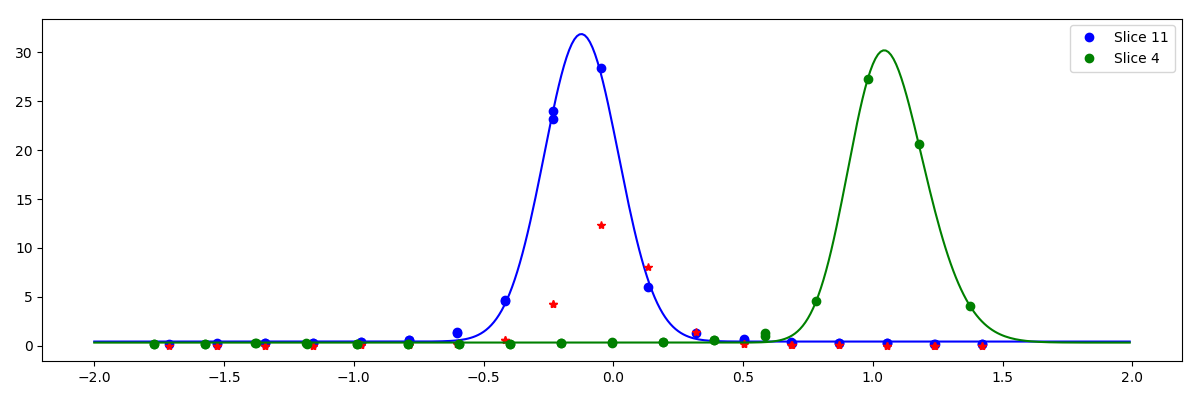

[  1.13045375e+01  -1.23121861e-01   1.43426354e-01   7.24549695e-07
   4.27283281e-01]


<IPython.core.display.Javascript object>


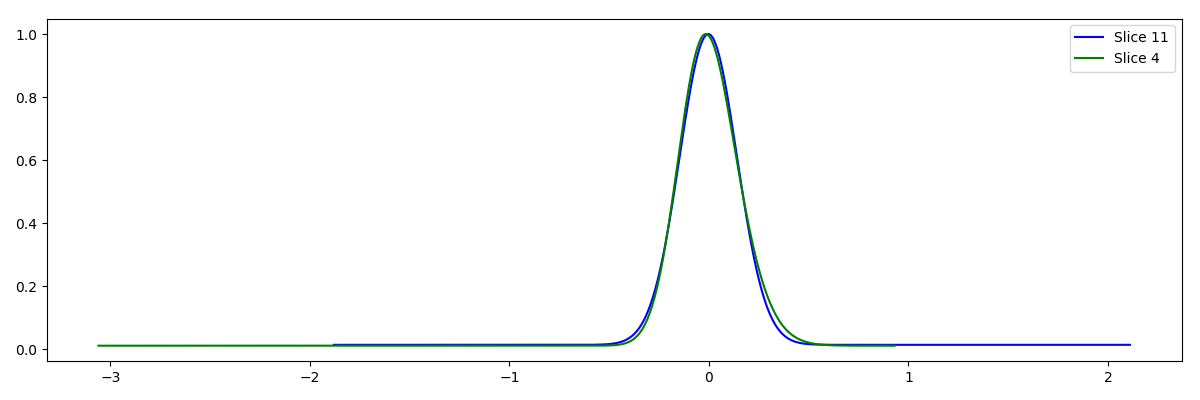

<IPython.core.display.Javascript object>


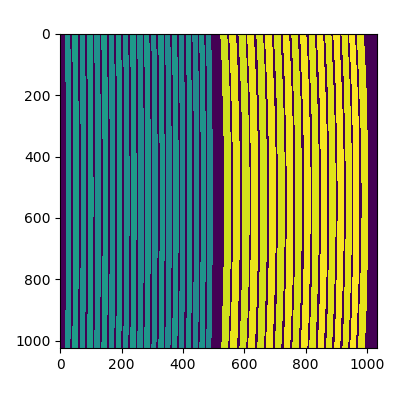

<IPython.core.display.Javascript object>


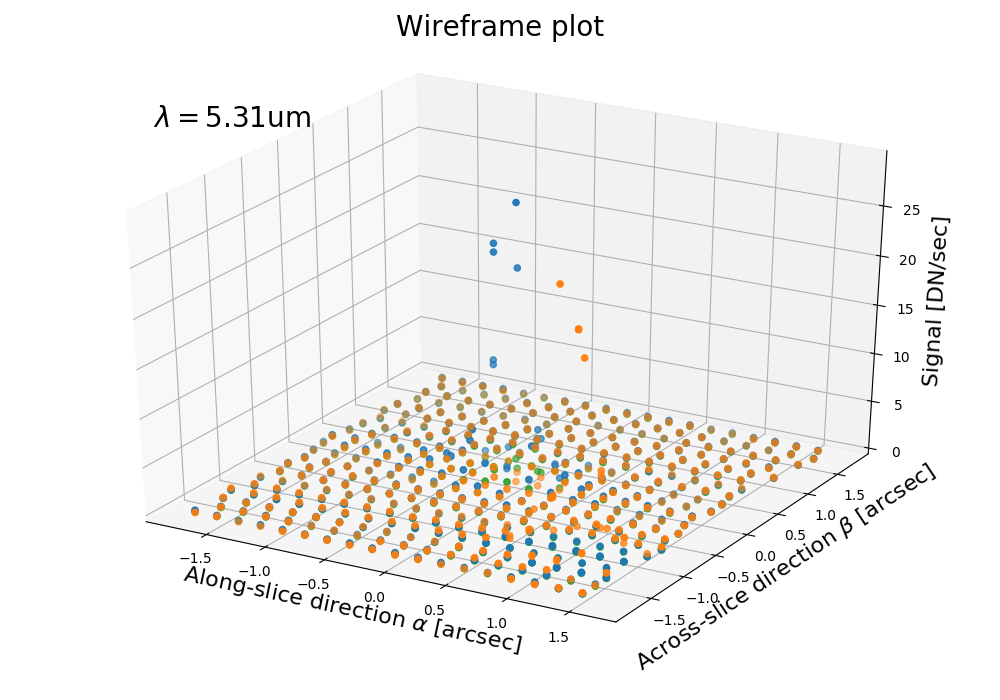

In [29]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf +bkg

ibin = 300
psf = source_signal_divfringe
psf2 = source_signal_divfringe2
psf[np.isnan(source_signal_divfringe)] = 0.

bounds = ([0,-4,0,0,0],[np.inf,4,1,np.inf,np.inf])

from scipy.optimize import curve_fit

plt.figure(figsize=(12,4))
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+11 ))
plt.plot(d2cMaps['alphaMap'][i,j],psf[i,j],'bo',label='Slice 11')
popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],psf[i,j],p0=[25,0,0.3,0,0],bounds=bounds)
print popt
testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy,'b')
plt.plot(d2cMaps['alphaMap'][i,j],psf_cdp[i,j]*1500.,'r*')
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+4 ))
plt.plot(d2cMaps['alphaMap'][i,j],psf2[i,j],'go',label='Slice 4')
popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],psf2[i,j],p0=[30,1,0.3,0,0],bounds=bounds)
testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy,'g')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(12,4))
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+11 ))
popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],psf[i,j],p0=[25,0,0.3,0,0],bounds=bounds)
testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx-testx[np.argmax(testy)],testy/np.max(testy),'b',label='Slice 11')
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+4 ))
popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],psf2[i,j],p0=[30,1,0.3,0,0],bounds=bounds)
testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx-testx[np.argmax(testy)]-0.02,testy/np.max(testy),'g',label='Slice 4')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(4,4))
plt.imshow(d2cMaps['sliceMap'])
plt.tight_layout()

# data to fit
coords = (np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.)
alphas, betas, zobs   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf[coords]
alphas, betas, zobs2   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf2[coords]
alphas, betas, zobs_cdp   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf_cdp[coords]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.scatter(alphas, betas, zobs)
ax.scatter(alphas, betas, zobs2)
ax.scatter(alphas, betas, zobs_cdp*300.)
# ax.plot_wireframe(alphai,betai, zpred,color='r', .alpha=0.15)
# ax.set_xlim(fov_lims[0],fov_lims[1])
# ax.set_ylim(unique_betas.min(),unique_betas.max())
ax.set_zlim(0)
ax.set_xlabel(r'Along-slice direction $\alpha$ [arcsec]',fontsize=16)
ax.set_ylabel(r'Across-slice direction $\beta$ [arcsec]',fontsize=16)
ax.set_zlabel('Signal [DN/sec]',fontsize=16)
ax.text2D(0.14, 0.85, r'$\lambda =$'+str(round(lambcens[ibin],2))+'um', transform=ax.transAxes,fontsize=20)
ax.tick_params(axis='both',labelsize=10)
plt.suptitle('Wireframe plot',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

<IPython.core.display.Javascript object>


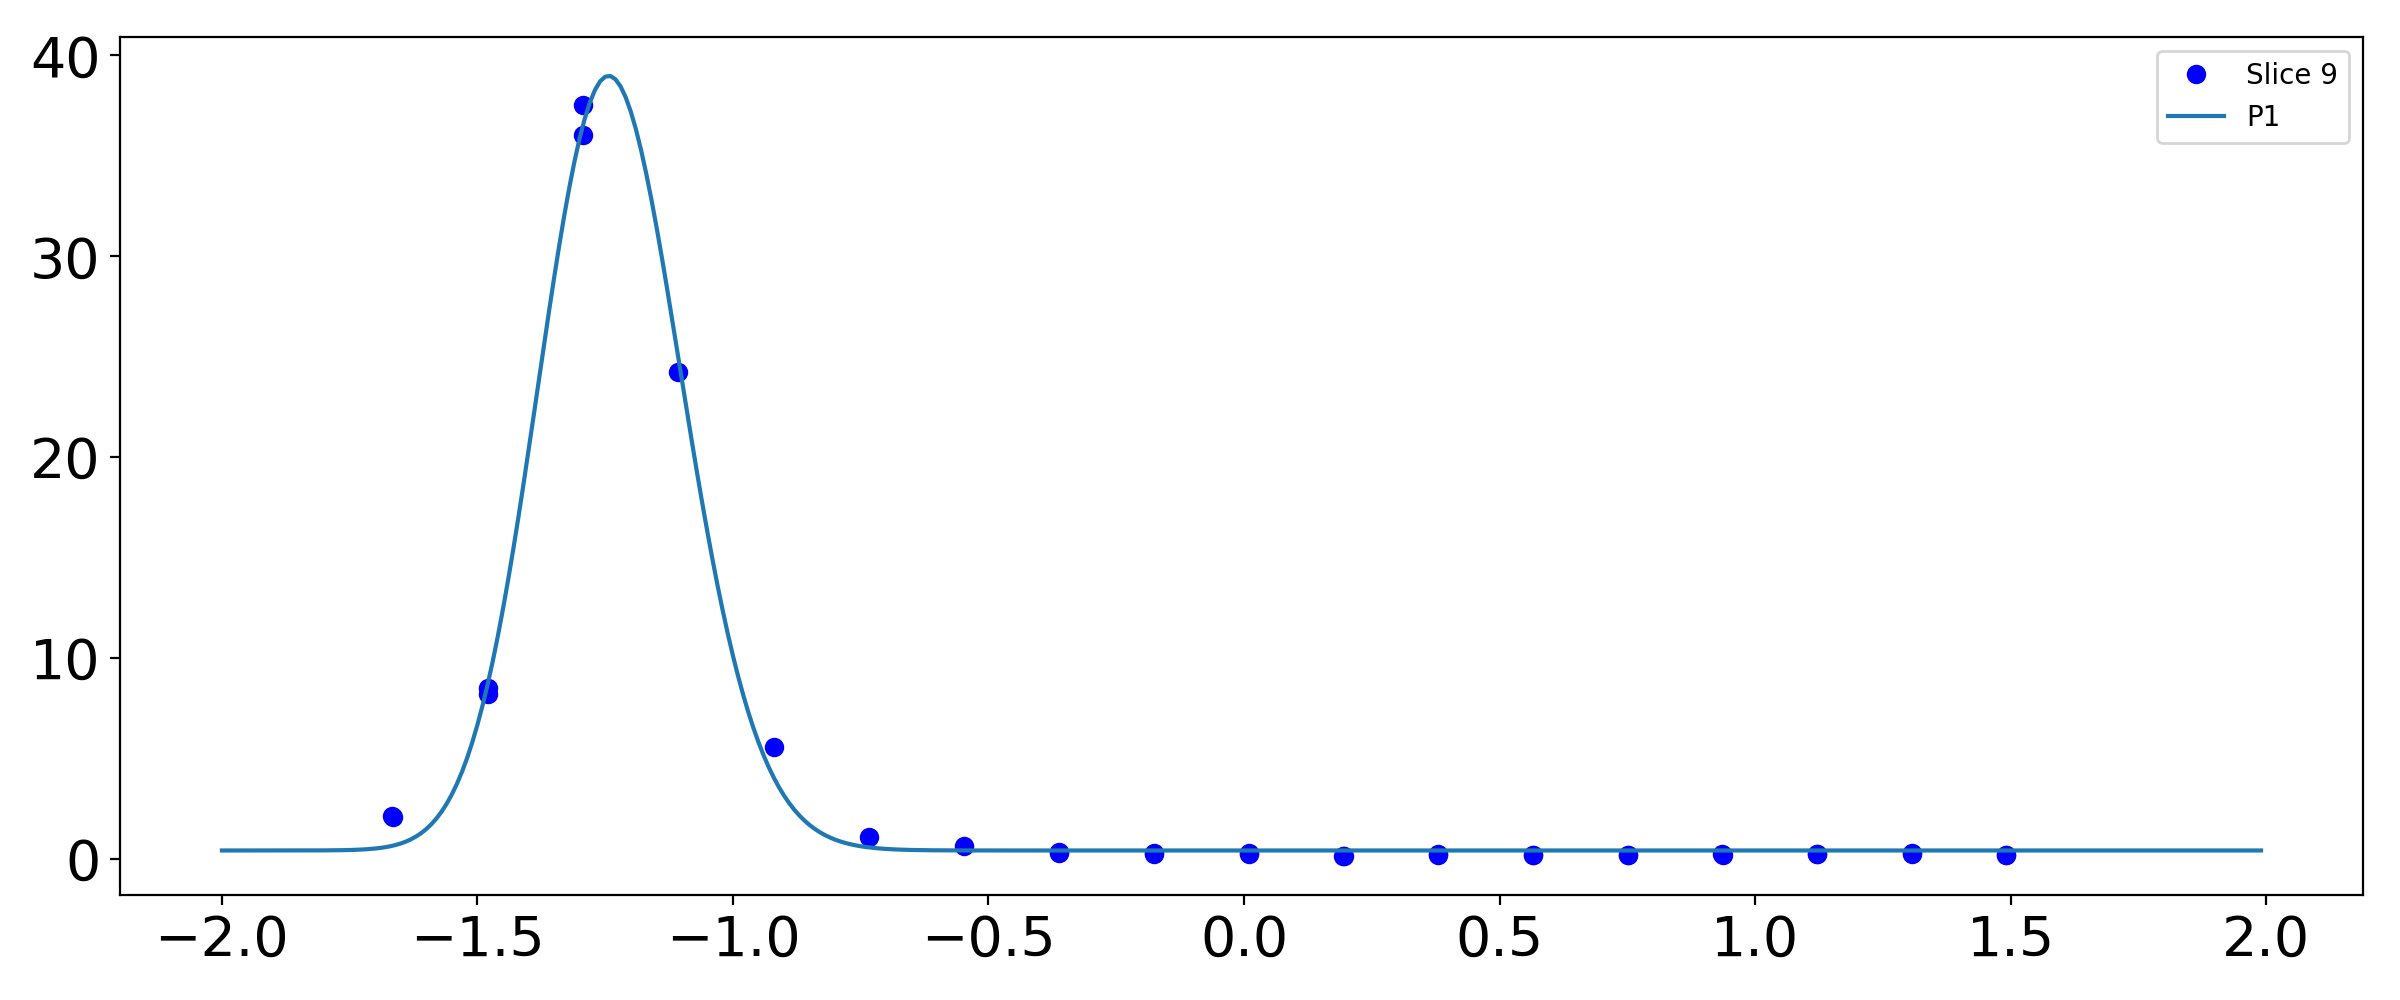

STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.28arcsec 

[ 13.60125513  -1.33017093   0.17176522   1.           0.43150461]


In [22]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf +bkg

ibin = 300
bounds = ([0,-4,0,0,0],[np.inf,4,1,1,np.inf])

plt.figure(figsize=(12,5))
for pointing in ['P1']:# mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='all').keys():
#     pointing = pointing.split('_')[1]
#     print pointing

    sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    source_signal = sci_img-bkg_img
    source_signal_divfringe = source_signal/fringe_img
    source_signal_divfringe[np.isnan(source_signal_divfringe)] = 0.
    
    source_center_slice,source_center_beta,source_center_alpha = funcs.point_source_centroiding(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='0D')

    i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+source_center_slice ))
    plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo',label='Slice {}'.format(source_center_slice))
    try:
        popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],p0=[source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0,0],bounds=bounds)
        print popt
        testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
        plt.plot(testx,testy,label=pointing)
    except:
        plt.scatter(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],label=pointing)
plt.tick_params(axis='both',labelsize=20)
plt.legend(loc='best')
plt.tight_layout()

<IPython.core.display.Javascript object>


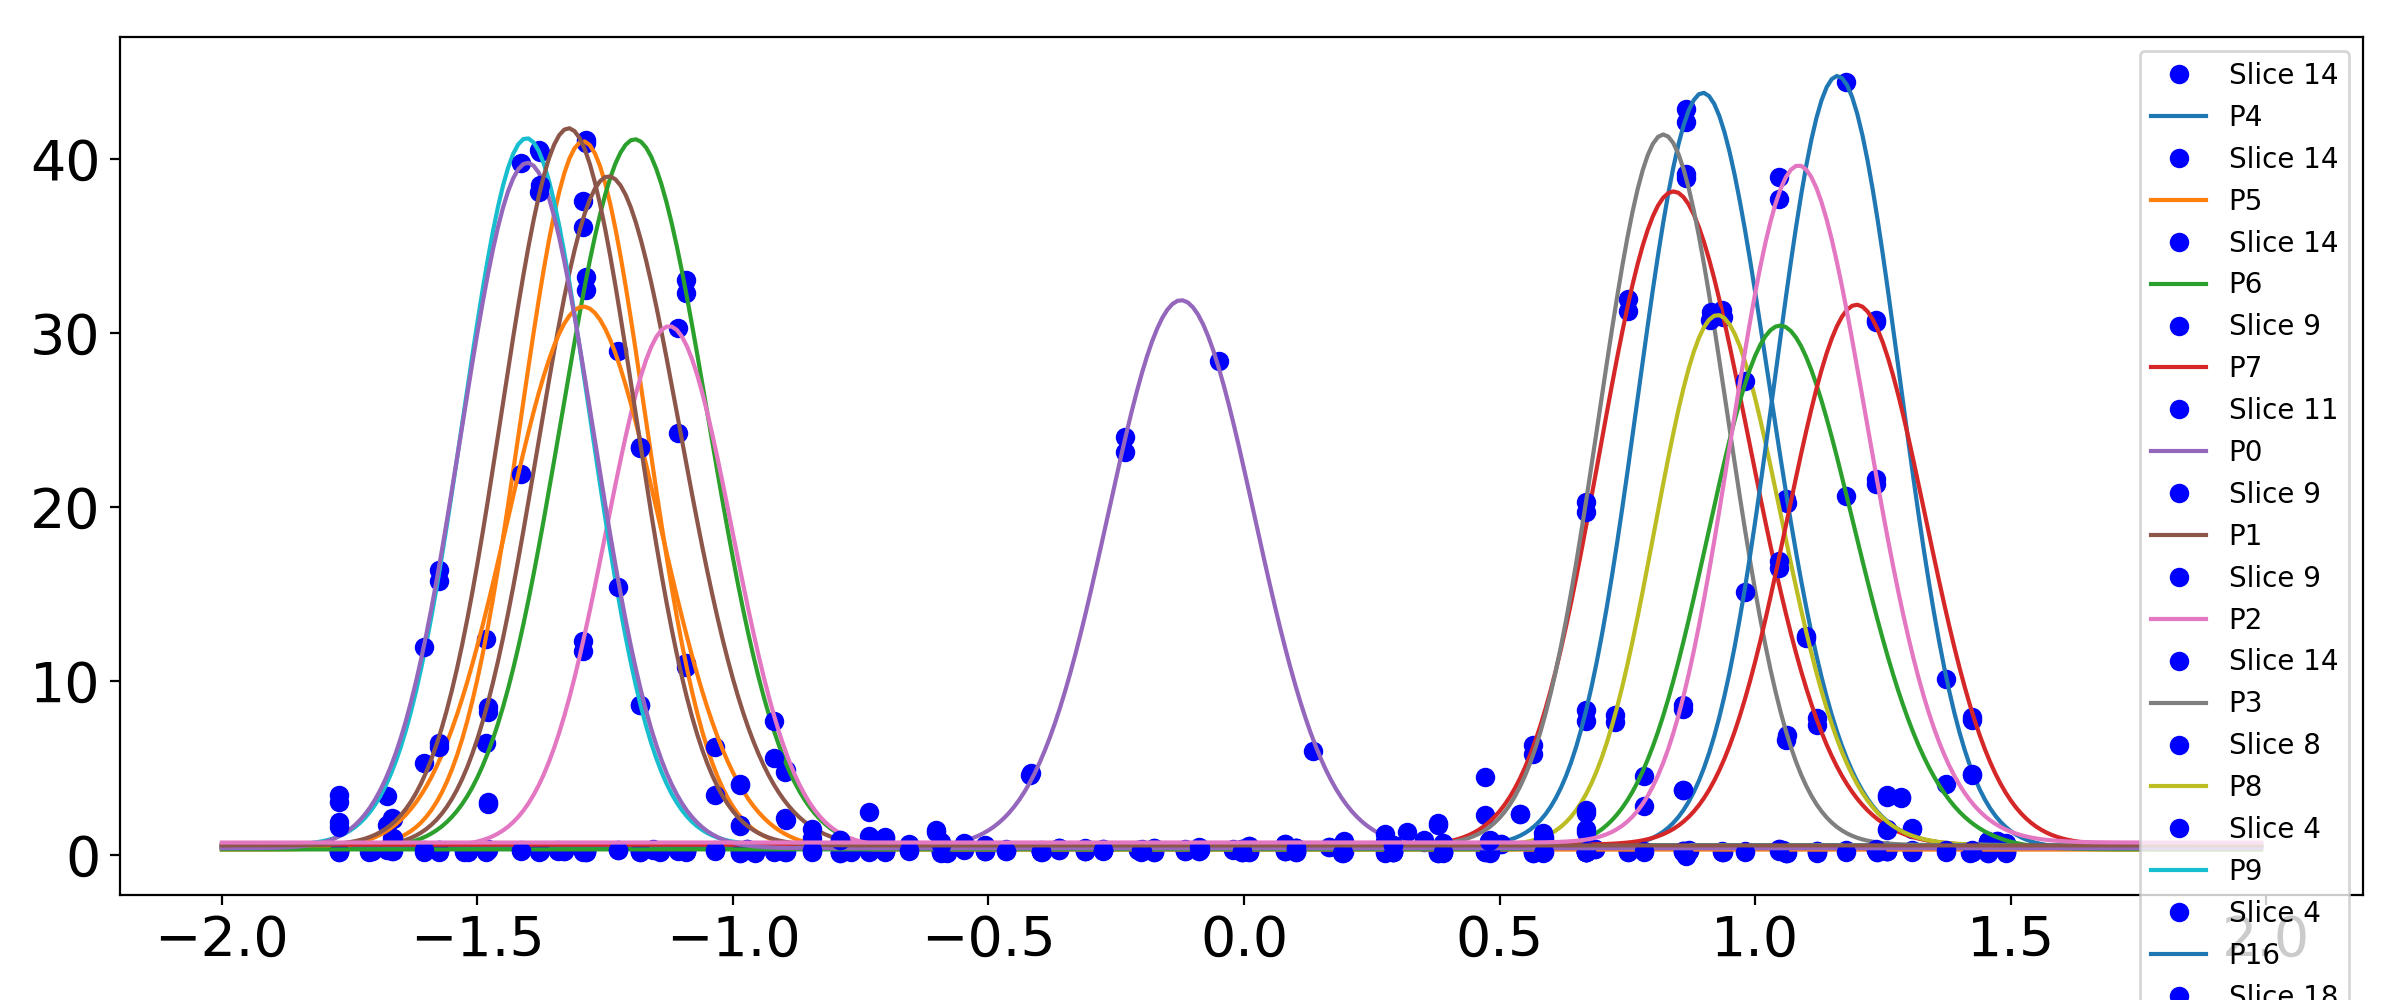

P4
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.88arcsec 

P5
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.31arcsec 

P6
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.22arcsec 

P7
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = 0.81arcsec 

P0
STEP 1: Rough centroiding
Slice 11 has the largest summed flux
Source position: beta = 0.0arcsec, alpha = -0.16arcsec 

P1
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.28arcsec 

P2
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.16arcsec 

P3
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.8arcsec 

P8
STEP 1: Ro

In [24]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf +bkg

ibin = 300
bounds = ([0,-4,0,0,0],[np.inf,4,1,1,np.inf])

plt.figure(figsize=(12,5))
for pointing in mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='all').keys():
    pointing = pointing.split('_')[1]
    print pointing

    sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    source_signal = sci_img-bkg_img
    source_signal_divfringe = source_signal/fringe_img
    source_signal_divfringe[np.isnan(source_signal_divfringe)] = 0.
    
    source_center_slice,source_center_beta,source_center_alpha = funcs.point_source_centroiding(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='0D')

    i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+source_center_slice ))
    plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo',label='Slice {}'.format(source_center_slice))
    try:
        popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],p0=[source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0,0],bounds=bounds)
        testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
        plt.plot(testx,testy,label=pointing)
    except:
        print "{} yields error".format(pointing)
        continue
plt.tick_params(axis='both',labelsize=20)
plt.legend(loc='best')
plt.tight_layout()

<IPython.core.display.Javascript object>


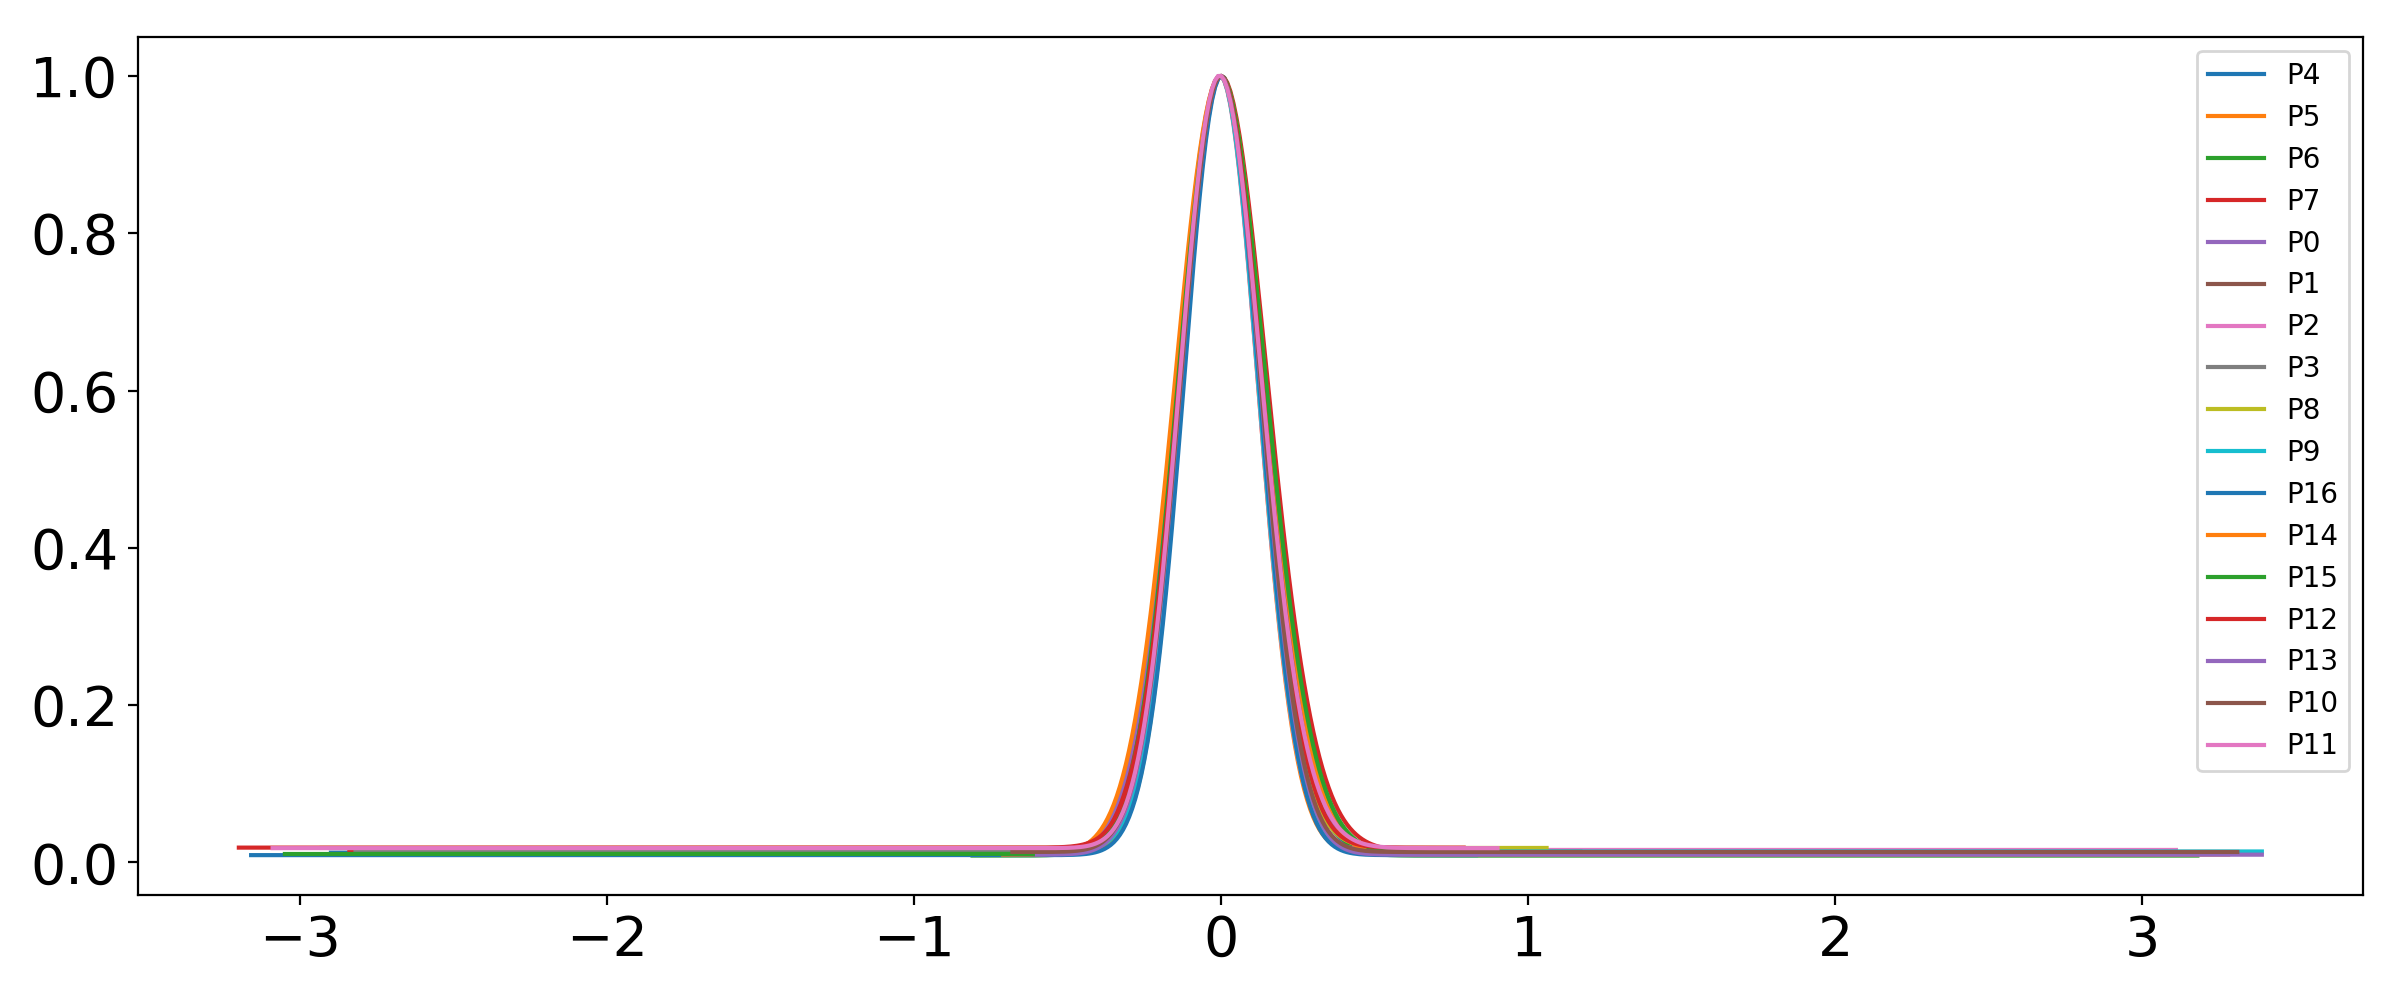

P4
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.88arcsec 

P5
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.31arcsec 

P6
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.22arcsec 

P7
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = 0.81arcsec 

P0
STEP 1: Rough centroiding
Slice 11 has the largest summed flux
Source position: beta = 0.0arcsec, alpha = -0.16arcsec 

P1
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.28arcsec 

P2
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.16arcsec 

P3
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.8arcsec 

P8
STEP 1: Ro

In [37]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf +bkg

ibin = 300
bounds = ([0,-4,0,0,0],[np.inf,4,1,1,np.inf])

plt.figure(figsize=(12,5))
sigmas,betas,alphas = [],[],[]
for pointing in mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='all').keys(): # ['CV2_P0','CV2_P1','CV2_P4','CV2_P5']:# 
    pointing = pointing.split('_')[1]
    print pointing

    sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    source_signal = sci_img-bkg_img
    source_signal_divfringe = source_signal/fringe_img
    source_signal_divfringe[np.isnan(source_signal_divfringe)] = 0.
    
    source_center_slice,source_center_beta,source_center_alpha = funcs.point_source_centroiding(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='0D')

    i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+source_center_slice ))
#     plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo',label='Slice {}'.format(source_center_slice))
    try:
        popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],p0=[source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0,0],bounds=bounds)
        testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
        plt.plot(testx-testx[np.argmax(testy)],testy/testy.max(),label=pointing)
        sigmas.append(popt[2]);betas.append(source_center_slice);alphas.append(source_center_alpha)
    except:
        print "{} yields error".format(pointing)
        continue
plt.tick_params(axis='both',labelsize=20)
plt.legend(loc='best')
plt.tight_layout()

In [40]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf +bkg

unique_betas = np.sort(np.unique(d2cMaps['betaMap'][(d2cMaps['sliceMap']>100*int(band[0])) & (d2cMaps['sliceMap']<100*(int(band[0])+1))]))

ibin = 500
bounds = ([0,-4,0,0,0],[np.inf,4,1,1,np.inf])

# plt.figure(figsize=(12,5))
sigma_alphas,sigma_betas,betas,alphas,slice_numbers = [],[],[],[],[]
for pointing in mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='all').keys(): # ['CV2_P0','CV2_P1','CV2_P4','CV2_P5']:# 
    pointing = pointing.split('_')[1]
    print pointing

    sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    source_signal = sci_img-bkg_img
    source_signal_divfringe = source_signal/fringe_img
    source_signal_divfringe[np.isnan(source_signal_divfringe)] = 0.
    
    source_center_slice,source_center_beta,source_center_alpha = funcs.point_source_centroiding(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='0D')
    sign_amp,alpha_centers,beta_centers,sigma_alpha,sigma_beta,bkg_amp = funcs.point_source_centroiding_singleBin(band,source_signal_divfringe,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D',ibin=300)
    sigma_alphas.append(sigma_alpha);sigma_betas.append(sigma_beta);betas.append(beta_centers);alphas.append(alpha_centers),slice_numbers.append(source_center_slice)
#     i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+source_center_slice ))
# #     plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo',label='Slice {}'.format(source_center_slice))
#     try:
#         popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],p0=[source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0,0],bounds=bounds)
#         testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
#         plt.plot(testx-testx[np.argmax(testy)],testy/testy.max(),label=pointing)
#         sigmas.append(popt[2]);betas.append(source_center_slice);alphas.append(source_center_alpha)
#     except:
#         print "{} yields error".format(pointing)
#         continue
# plt.tick_params(axis='both',labelsize=20)
# plt.legend(loc='best')
# plt.tight_layout()
    print ''


P4
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.88arcsec 

STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 0.88arcsec 

STEP 2: 1D Gaussian fit
STEP 3: 2D Gaussian fit

P5
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.31arcsec 

STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.31arcsec 

STEP 2: 1D Gaussian fit
STEP 3: 2D Gaussian fit

P6
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.22arcsec 

STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.22arcsec 

STEP 2: 1D Gaussian fit
STEP 3: 2D Gaussian fit

P7
STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = 0.81arcsec

<IPython.core.display.Javascript object>


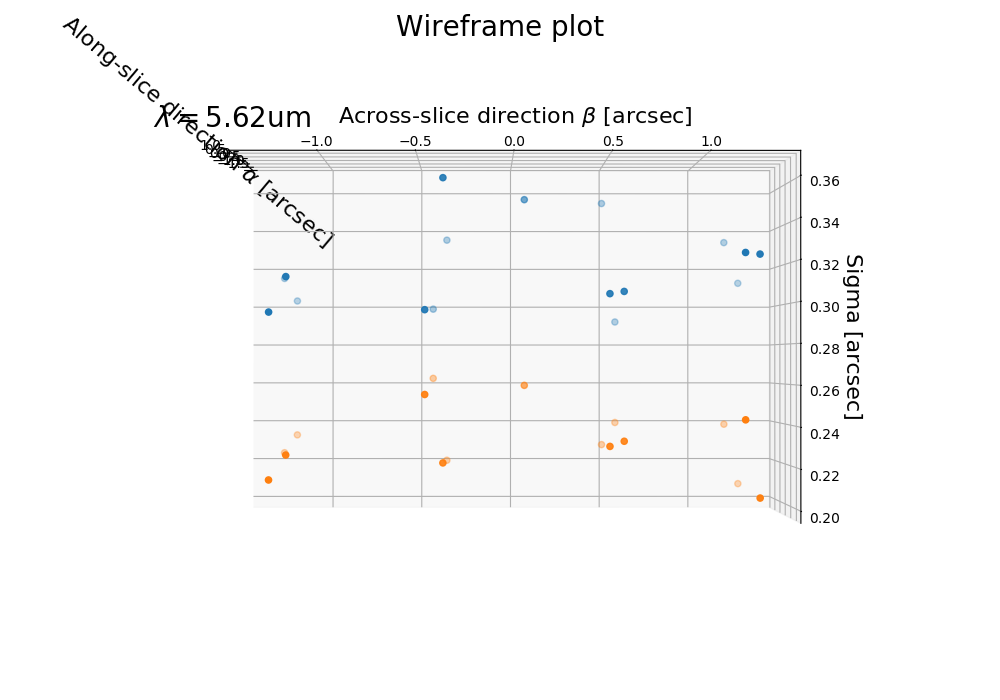

<IPython.core.display.Javascript object>


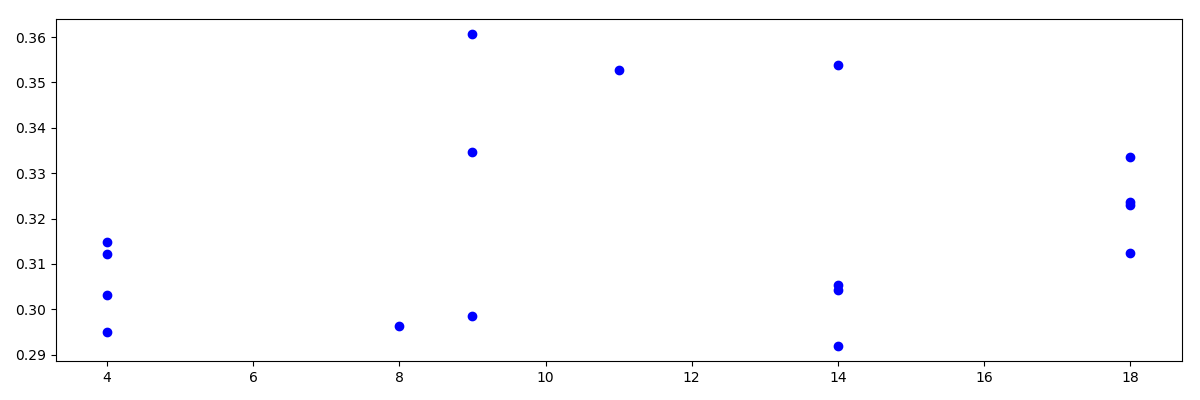

[14, 14, 14, 9, 11, 9, 9, 14, 8, 4, 4, 18, 4, 18, 18, 4, 18]
17


In [55]:
sigma_alphas = np.array(sigma_alphas)
sigma_betas = np.array(sigma_betas)
betas  = np.array(betas)
alphas = np.array(alphas)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.scatter(alphas, betas, sigma_alphas*2.355)
ax.scatter(alphas, betas, sigma_betas*2.355)
ax.set_xlabel(r'Along-slice direction $\alpha$ [arcsec]',fontsize=16)
ax.set_ylabel(r'Across-slice direction $\beta$ [arcsec]',fontsize=16)
ax.set_zlabel('Sigma [arcsec]',fontsize=16)
ax.text2D(0.14, 0.85, r'$\lambda =$'+str(round(lambcens[ibin],2))+'um', transform=ax.transAxes,fontsize=20)
ax.tick_params(axis='both',labelsize=10)
plt.suptitle('Wireframe plot',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(slice_numbers, sigma_alphas*2.355,'bo')
plt.tight_layout()

print slice_numbers
print len(slice_numbers)
# 11,21,10,20,9,19,8,18,7,17,6,16,5,15,4,14,3,13,2,12,1

In [48]:
order = [5,5,5,1,0,1,1,5,2,4,4,3,4,3,3,4,3]
print len(order)

# slices = [x for _,x in sorted(zip(order,slice_numbers))]
sigmas = [x for _,x in sorted(zip(order,sigma_alphas))]

17


[14, 14, 14, 9, 11, 9, 9, 14, 8, 4, 4, 18, 4, 18, 18, 4, 18]
[11, 9, 9, 9, 8, 18, 18, 18, 18, 4, 4, 4, 4, 14, 14, 14, 14]


<IPython.core.display.Javascript object>


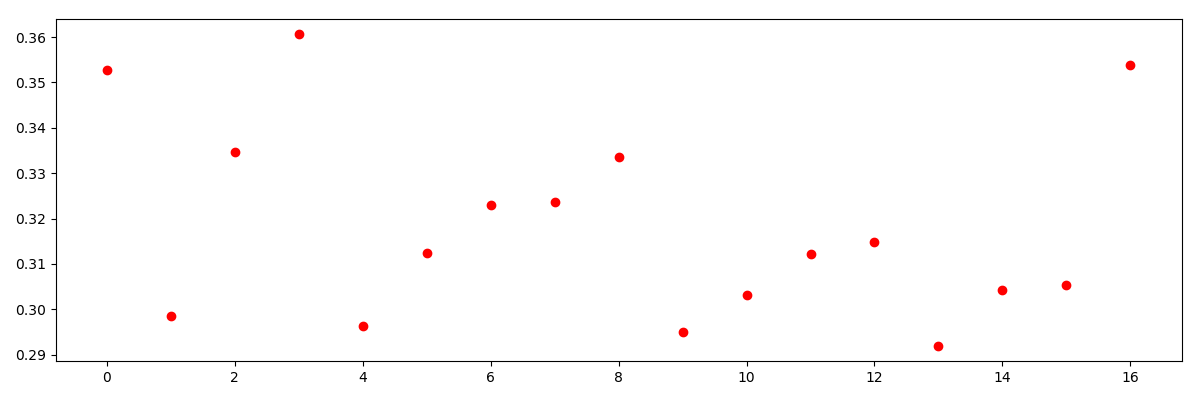

In [53]:
print slice_numbers
print slices

plt.figure(figsize=(12,4))
# plt.plot(slices, np.array(sigmas)*2.355,'bo')
plt.plot(np.array(sigmas)*2.355,'ro')
plt.tight_layout()

<IPython.core.display.Javascript object>


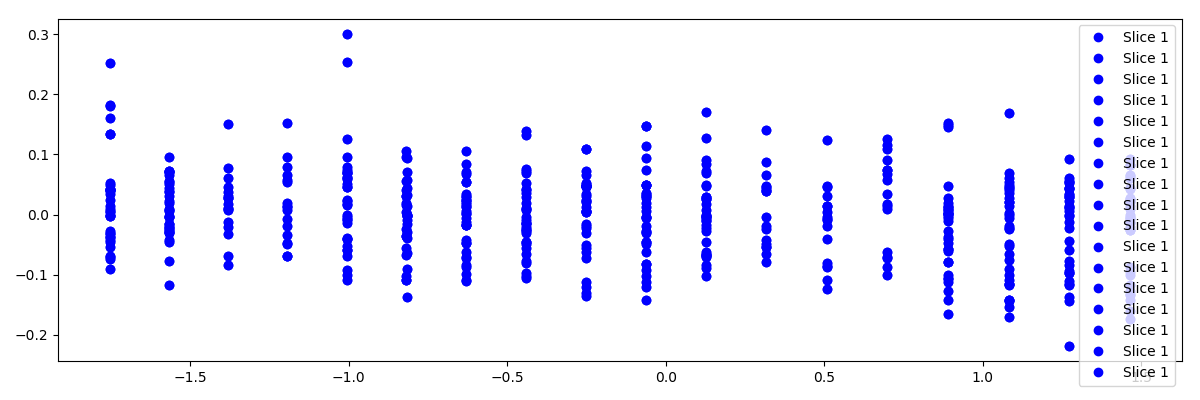

P4
[0.14899604, -0.13859379429675958, 0.15, 0, 0]
P5
[0.063105136, -0.12663504983651641, 0.15, 0, 0]
P6
[0.094111487, -0.10345649419062795, 0.15, 0, 0]
P7
[0.091218039, 0.12514916527090725, 0.15, 0, 0]
P0
[0.1824486, -0.55117078149226006, 0.15, 0, 0]
P1
[0.091337465, -0.43902519093660991, 0.15, 0, 0]
P2
[0.071221031, -0.53328098412006919, 0.15, 0, 0]
P3
[0.10656013, -0.23521758008166296, 0.15, 0, 0]
P8
[0.08825478, 0.24319328961763068, 0.15, 0, 0]
P9
[0.30038923, -1.0486378994213386, 0.15, 0, 0]
P16
[0.11575846, 0.17711321736169972, 0.15, 0, 0]
P14
[0.0071743997, -0.66161431942762872, 0.15, 0, 0]
P15
[0.093132235, 0.66916120432884041, 0.15, 0, 0]
P12
[0.031276643, -0.70130521033467108, 0.15, 0, 0]
P13
[-0.0096728103, -0.6523462074109958, 0.15, 0, 0]
P10
[0.18060045, -1.0428978807796312, 0.15, 0, 0]
P11
[0.015935937, -0.65786946787534306, 0.15, 0, 0]


In [39]:
def skewnorm_func(x, A, mu, sigmag, alpha, bkg):
    #normal distribution
    import scipy.special as sp
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*A*normpdf*normcdf

# distortion maps
sliceMap  = d2cMaps['sliceMap']
lambdaMap = d2cMaps['lambdaMap']
alphaMap  = d2cMaps['alphaMap']
betaMap   = d2cMaps['betaMap']
nslices   = d2cMaps['nslices']
MRS_alphapix = {'1':0.196,'2':0.196,'3':0.245,'4':0.273} # arcseconds
MRS_FWHM = {'1':2.16*MRS_alphapix['1'],'2':3.30*MRS_alphapix['2'],
            '3':4.04*MRS_alphapix['3'],'4':5.56*MRS_alphapix['4']} # MRS PSF
mrs_fwhm  = MRS_FWHM[band[0]]
unique_betas = np.sort(np.unique(betaMap[(sliceMap>100*int(band[0])) & (sliceMap<100*(int(band[0])+1))]))
fov_lims  = [alphaMap[np.nonzero(lambdaMap)].min(),alphaMap[np.nonzero(lambdaMap)].max()]

plt.figure(figsize=(12,4))
for pointing in mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing='all').keys():
    pointing = pointing.split('_')[1]
    print pointing

    sci_img,bkg_img = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    source_signal = sci_img-bkg_img
    source_signal_divfringe = source_signal/fringe_img
    source_signal_divfringe[np.isnan(source_signal_divfringe)] = 0.
    
    # across-slice center:
    sum_signals = np.zeros(nslices)
    for islice in range(1+nslices):
        sum_signals[islice-1] = sci_img[(sliceMap == 100*int(band[0])+islice) & (~np.isnan(source_signal_divfringe))].sum()
    source_center_slice = np.argmax(sum_signals)+1
    source_center_beta  = unique_betas[source_center_slice-1]

    # along-slice center:
    det_dims = (1024,1032)
    img = np.full(det_dims,0.)
    sel = (sliceMap == 100*int(band[0])+source_center_slice)
    img[sel]  = source_signal_divfringe[sel]

    source_center_alphas = []
    for row in range(det_dims[0]):
        source_center_alphas.append(alphaMap[row,img[row,:].argmax()])
    source_center_alphas = np.array(source_center_alphas)
    source_center_alpha  = np.average(source_center_alphas[~np.isnan(source_center_alphas)])

    i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+source_center_slice ))
    plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo',label='Slice {}'.format(source_center_slice))
    print [source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0]
    try:
        popt,pcov = curve_fit(skewnorm_func,d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],p0=[source_signal_divfringe[i,j].max(),source_center_alpha,0.15,0],bounds=bounds)
        testx,testy = np.arange(-2,2,0.01),skewnorm_func(np.arange(-2,2,0.01),*popt)
        plt.plot(testx-testx[np.argmax(testy)],testy,'b')
    except:
        plt.plot(d2cMaps['alphaMap'][i,j],source_signal_divfringe[i,j],'bo')

plt.legend(loc='best')
plt.tight_layout()

<IPython.core.display.Javascript object>


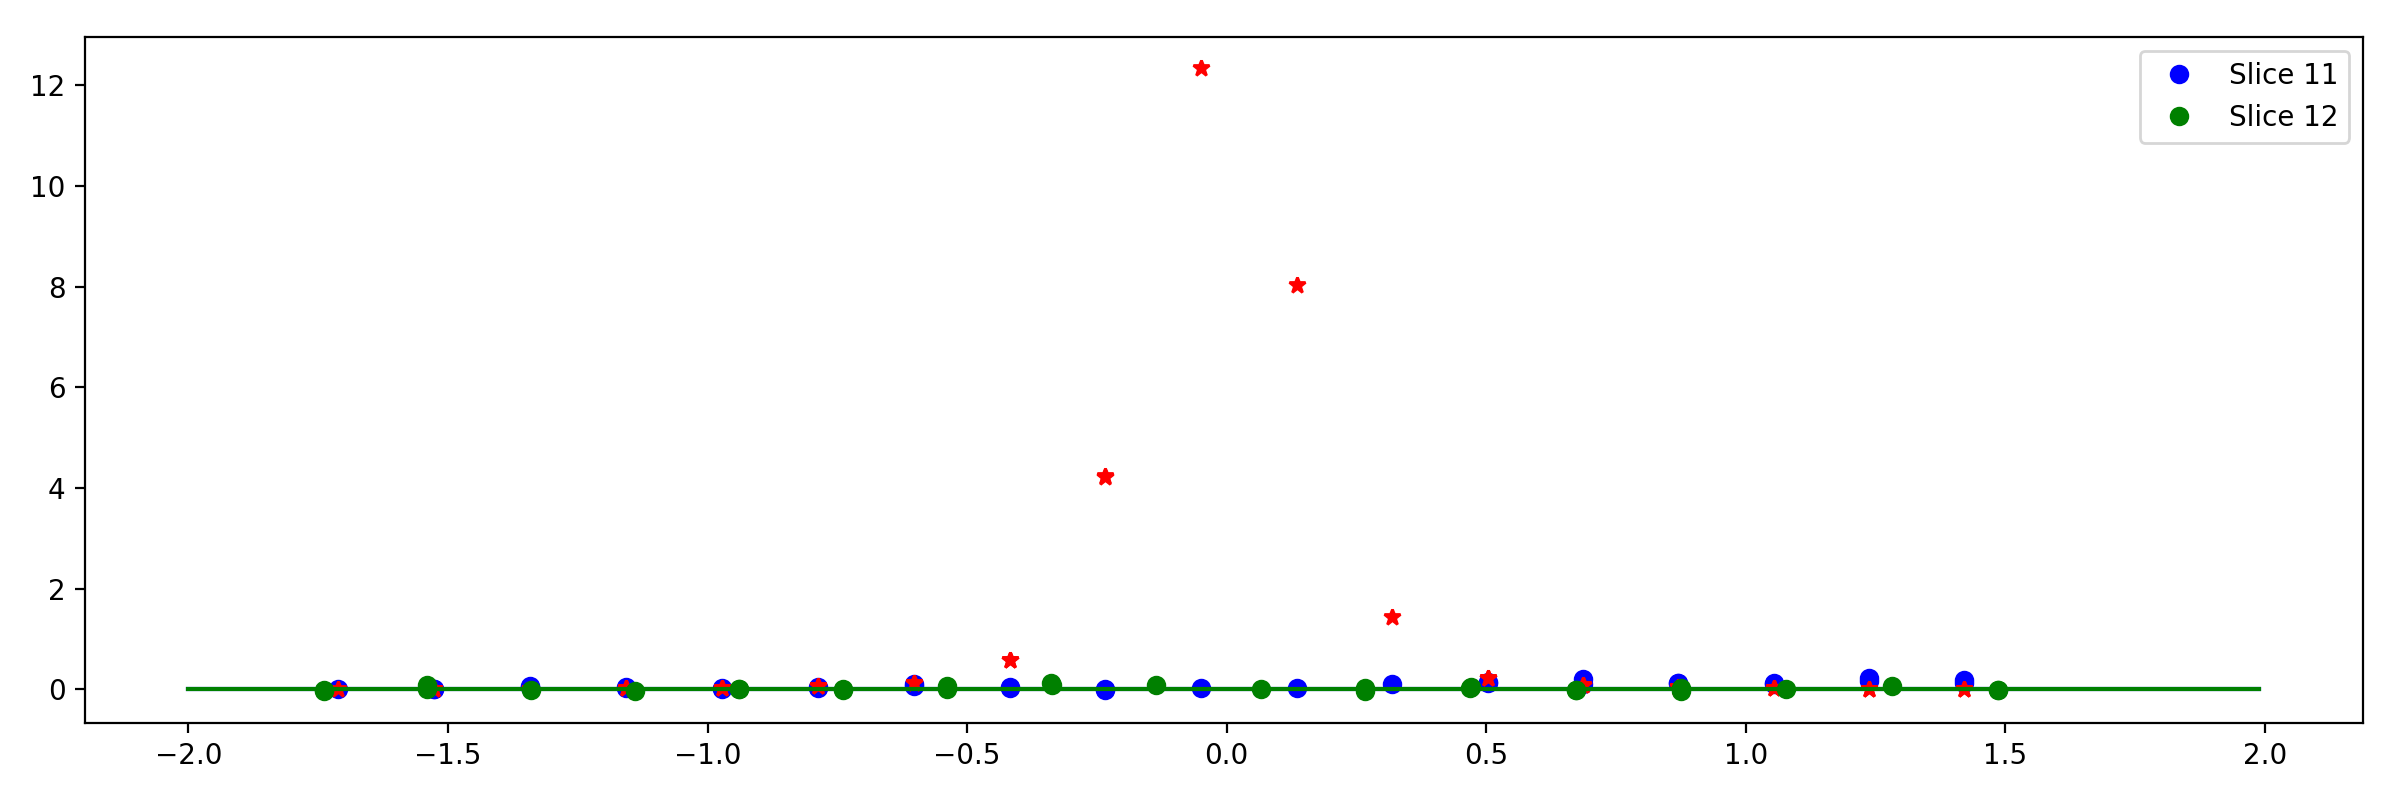

<IPython.core.display.Javascript object>


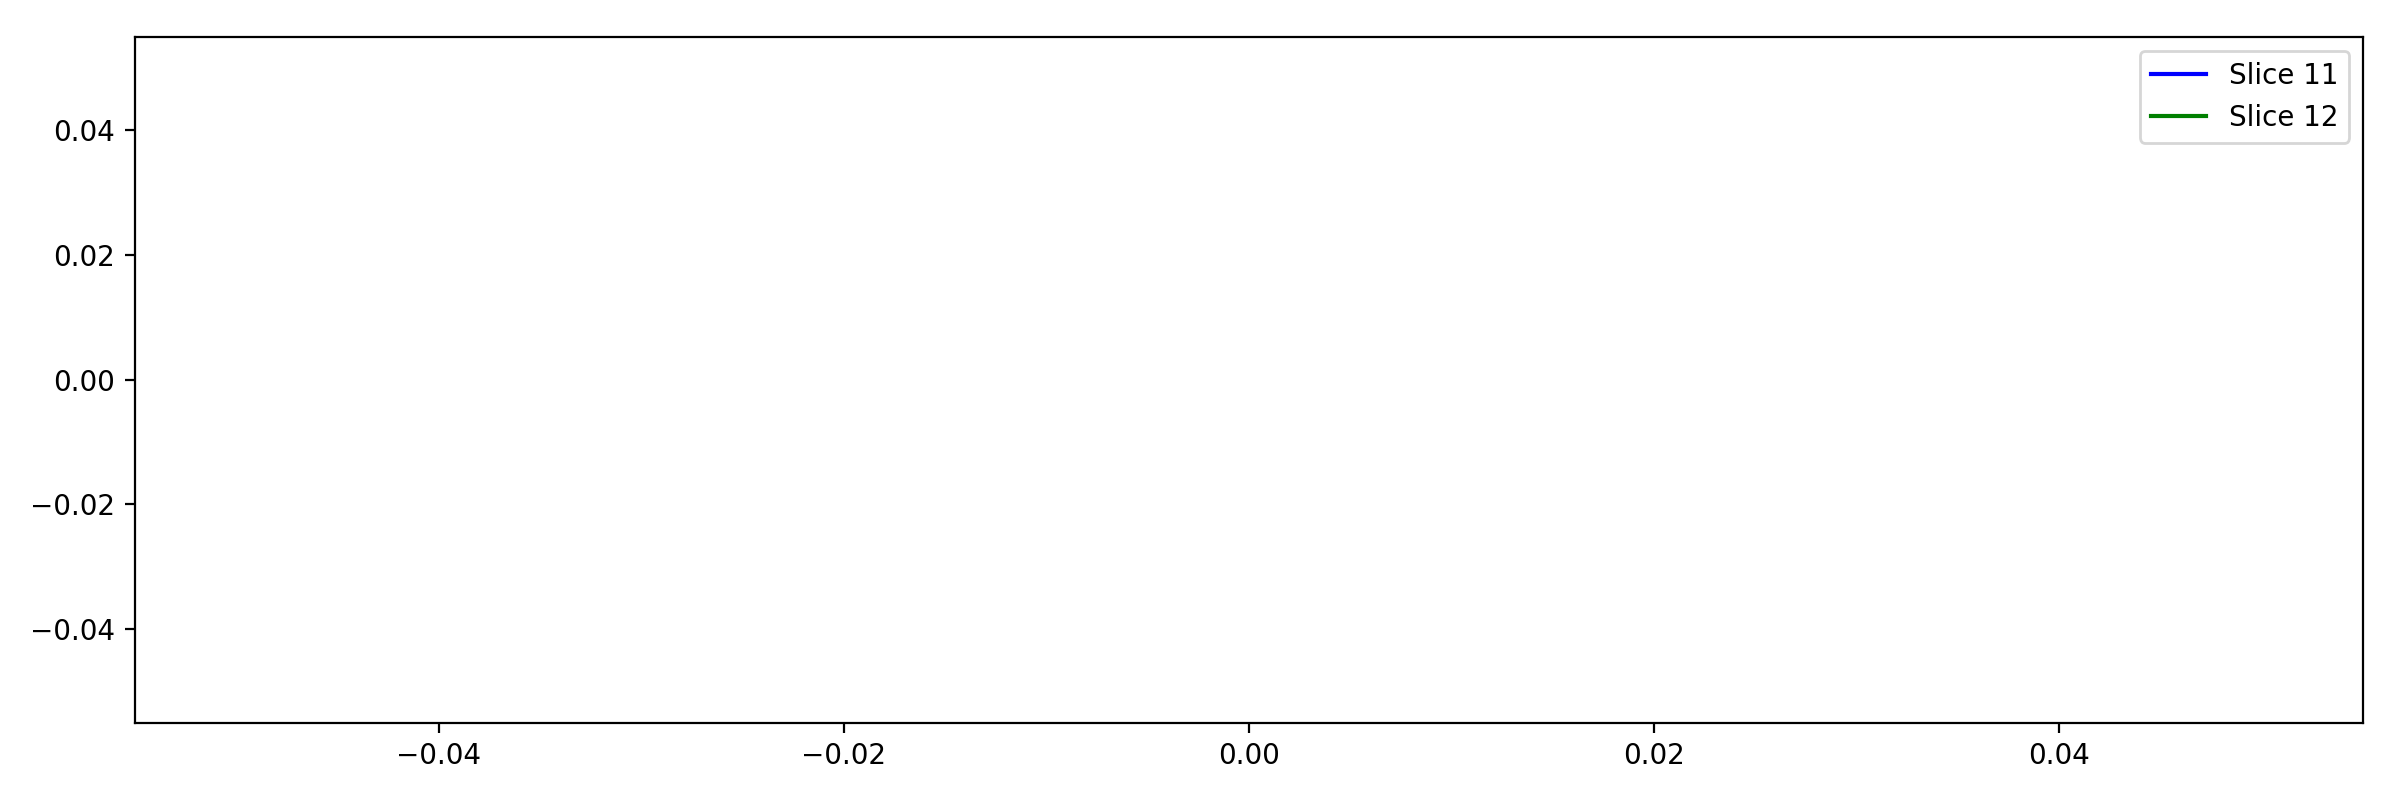

<IPython.core.display.Javascript object>


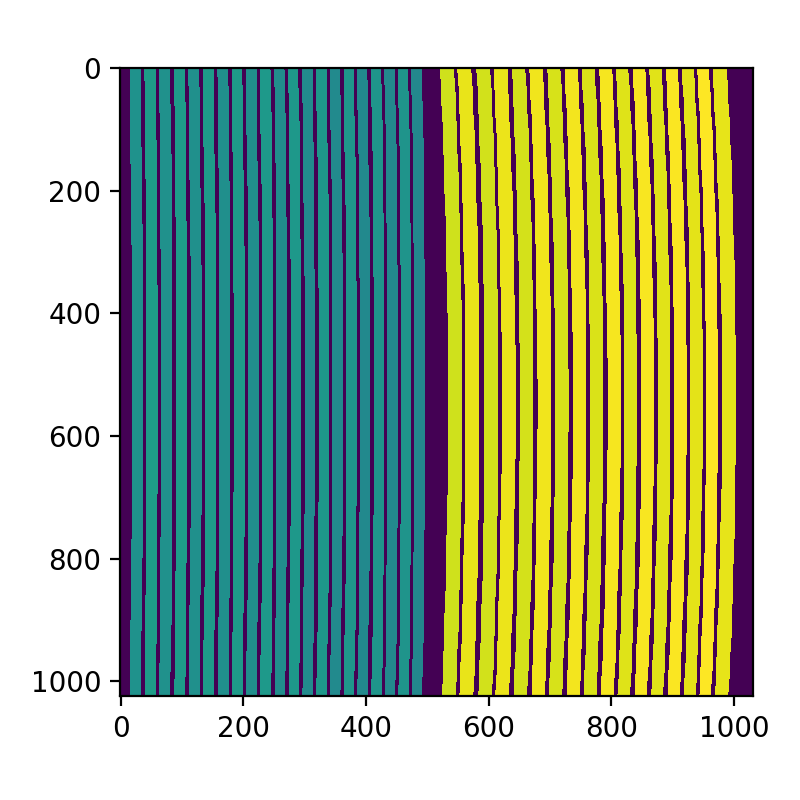

<IPython.core.display.Javascript object>


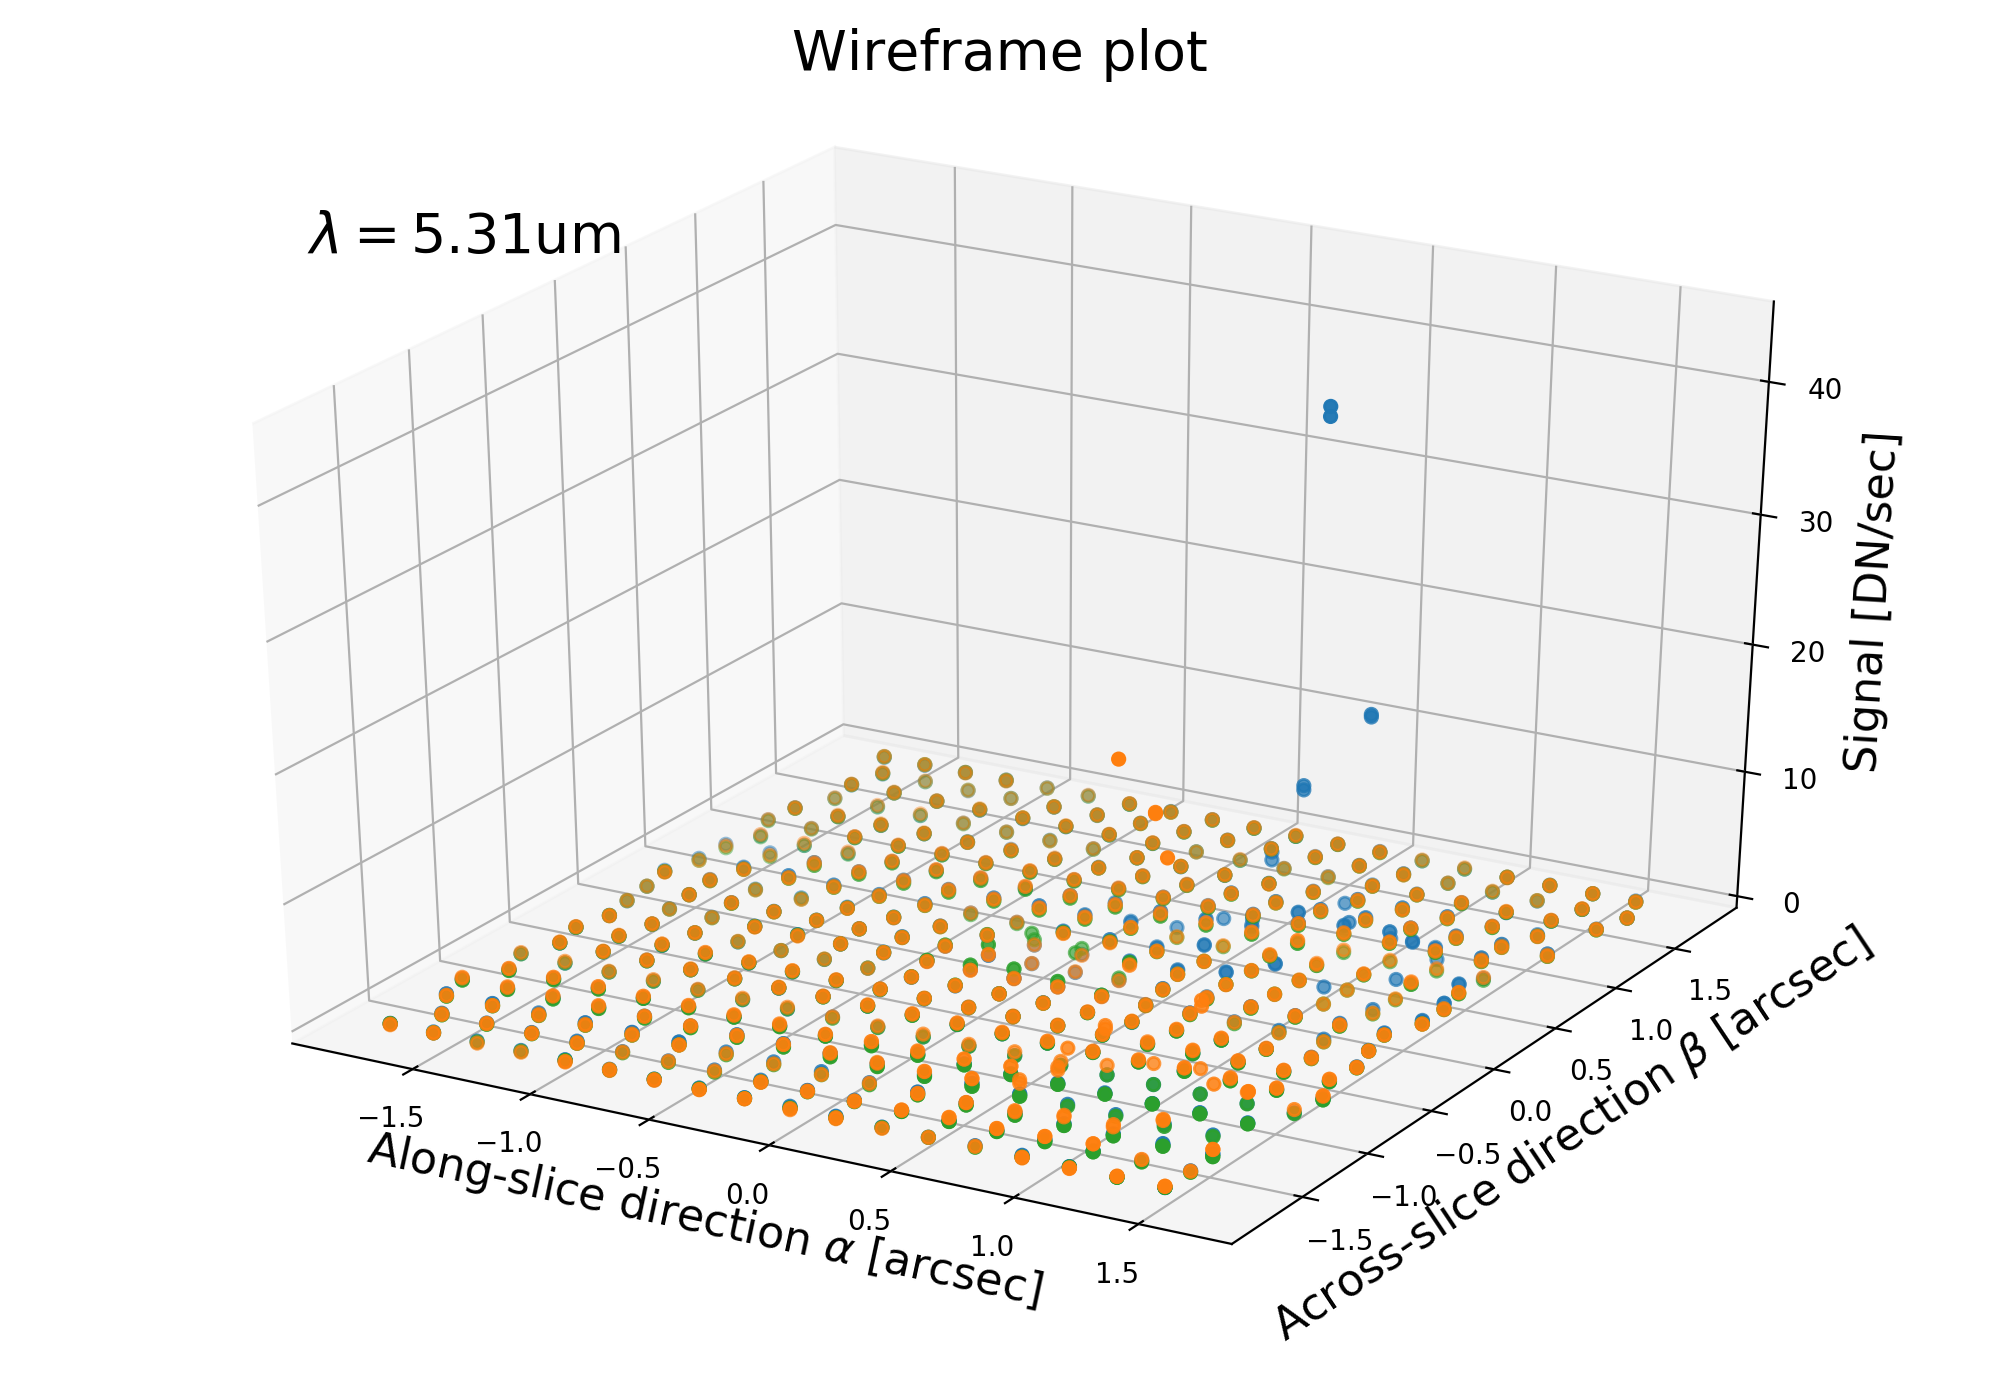

In [31]:
# perform example calculation in one spectral bin
ibin = 300
psf = source_signal_divfringe
psf2 = source_signal_divfringe2
psf[np.isnan(source_signal_divfringe)] = 0.

from scipy.optimize import curve_fit

plt.figure(figsize=(12,4))
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+11 ))
plt.plot(d2cMaps['alphaMap'][i,j],psf[i,j],'bo',label='Slice 11')
popt,pcov = curve_fit(funcs.skewnorm_func,d2cMaps['alphaMap'][i,j],psf[i,j],p0=[2.5,-0.18,0.3,0])
testx,testy = np.arange(-2,2,0.01),funcs.skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy,'b')
plt.plot(d2cMaps['alphaMap'][i,j],psf_cdp[i,j]*1500.,'r*')
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+12 ))
plt.plot(d2cMaps['alphaMap'][i,j],psf2[i,j],'go',label='Slice 12')
popt,pcov = curve_fit(funcs.skewnorm_func,d2cMaps['alphaMap'][i,j],psf2[i,j],p0=[3,-0.18,0.3,0])
testx,testy = np.arange(-2,2,0.01),funcs.skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy,'g')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(12,4))
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+11 ))
popt,pcov = curve_fit(funcs.skewnorm_func,d2cMaps['alphaMap'][i,j],psf[i,j],p0=[2.5,-0.18,0.3,0])
testx,testy = np.arange(-2,2,0.01),funcs.skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy/np.max(testy),'b',label='Slice 11')
i,j = np.where((np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.) & (d2cMaps['sliceMap']==100*int(band[0])+12 ))
popt,pcov = curve_fit(funcs.skewnorm_func,d2cMaps['alphaMap'][i,j],psf2[i,j],p0=[3,-0.18,0.3,0])
testx,testy = np.arange(-2,2,0.01),funcs.skewnorm_func(np.arange(-2,2,0.01),*popt)
plt.plot(testx,testy/np.max(testy),'g',label='Slice 12')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(4,4))
plt.imshow(d2cMaps['sliceMap'])
plt.tight_layout()

# data to fit
coords = (np.abs(d2cMaps['lambdaMap']-lambcens[ibin])<lambfwhms[ibin]/2.)
alphas, betas, zobs   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf[coords]
alphas, betas, zobs2   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf2[coords]
alphas, betas, zobs_cdp   = d2cMaps['alphaMap'][coords],d2cMaps['betaMap'][coords],psf_cdp[coords]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.scatter(alphas, betas, zobs)
ax.scatter(alphas, betas, zobs2)
ax.scatter(alphas, betas, zobs_cdp*300.)
# ax.plot_wireframe(alphai,betai, zpred,color='r', .alpha=0.15)
# ax.set_xlim(fov_lims[0],fov_lims[1])
# ax.set_ylim(unique_betas.min(),unique_betas.max())
ax.set_zlim(0)
ax.set_xlabel(r'Along-slice direction $\alpha$ [arcsec]',fontsize=16)
ax.set_ylabel(r'Across-slice direction $\beta$ [arcsec]',fontsize=16)
ax.set_zlabel('Signal [DN/sec]',fontsize=16)
ax.text2D(0.14, 0.85, r'$\lambda =$'+str(round(lambcens[ibin],2))+'um', transform=ax.transAxes,fontsize=20)
ax.tick_params(axis='both',labelsize=10)
plt.suptitle('Wireframe plot',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()